Stock Prediction

Install yfinance, the library will be used to pull data
Install other python libraries essential for data analysis, predicting, and modeling

In [76]:
!pip install yfinance==0.1.62
!pip install numpy
!pip install sklearn
!pip install pandas
!pip install matplotlib
!pip install seaborn

You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Import python libraries

In [77]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [78]:
spy = yf.Ticker("SPY")

In [79]:
df = spy.history(period = "max")
df.to_csv('SPYHist.csv')
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.352051,25.352051,25.225921,25.334032,1003200,0.0,0
1993-02-01,25.352041,25.514208,25.352041,25.514208,480500,0.0,0
1993-02-02,25.496203,25.586296,25.442148,25.568277,201300,0.0,0
1993-02-03,25.604306,25.856565,25.586288,25.838547,529400,0.0,0
1993-02-04,25.928635,26.000709,25.640339,25.946653,531500,0.0,0


In [80]:
df = pd.read_csv('SPYHist.csv')
df2 = pd.read_csv('SPYHist.csv')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.tail(13)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
7501,2022-11-10,388.049988,395.040009,385.640015,394.690002,141455800,0.0,0,2022,11
7502,2022-11-11,395.589996,399.350006,393.609985,398.510010,93758600,0.0,0,2022,11
7503,2022-11-14,396.660004,400.179993,394.829987,395.119995,71903500,0.0,0,2022,11
7504,2022-11-15,401.149994,402.309998,394.489990,398.489990,93194500,0.0,0,2022,11
7505,2022-11-16,396.779999,397.779999,394.790009,395.450012,68508500,0.0,0,2022,11
7506,2022-11-17,390.459991,394.950012,390.140015,394.239990,74496300,0.0,0,2022,11
7507,2022-11-18,397.739990,397.809998,393.040009,396.029999,92783500,0.0,0,2022,11
7508,2022-11-21,394.640015,395.820007,392.660004,394.589996,51243200,0.0,0,2022,11
7509,2022-11-22,396.630005,400.070007,395.149994,399.899994,60429000,0.0,0,2022,11
7510,2022-11-23,399.549988,402.929993,399.309998,402.420013,68261600,0.0,0,2022,11


In [81]:
col = 'Close'
forecast_out = 10
df['label'] = df[col].shift(-forecast_out)
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100
df.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,label,PCT_change
7504,2022-11-15,401.149994,402.309998,394.489990,398.489990,93194500,0.0,0,2022,11,NaN,-0.663095
7505,2022-11-16,396.779999,397.779999,394.790009,395.450012,68508500,0.0,0,2022,11,NaN,-0.335195
7506,2022-11-17,390.459991,394.950012,390.140015,394.239990,74496300,0.0,0,2022,11,NaN,0.968089
7507,2022-11-18,397.739990,397.809998,393.040009,396.029999,92783500,0.0,0,2022,11,NaN,-0.429927
7508,2022-11-21,394.640015,395.820007,392.660004,394.589996,51243200,0.0,0,2022,11,NaN,-0.012674
7509,2022-11-22,396.630005,400.070007,395.149994,399.899994,60429000,0.0,0,2022,11,NaN,0.824443
7510,2022-11-23,399.549988,402.929993,399.309998,402.420013,68261600,0.0,0,2022,11,NaN,0.718315
7511,2022-11-25,401.829987,402.910004,401.540009,402.329987,30545400,0.0,0,2022,11,NaN,0.124431
7512,2022-11-28,399.089996,400.809998,395.109985,395.910004,67881600,0.0,0,2022,11,NaN,-0.796811
7513,2022-11-29,396.049988,397.290009,393.299988,395.230011,52027831,0.0,0,2022,11,NaN,-0.207039


In [82]:
X = df[['Open', 'Volume', 'PCT_change']]
X_new = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
Y = np.array(df['label'])
print(X.shape, Y.shape)



(7504, 3) (7504,)


In [83]:
X_new.head(10)

,Open,Volume,PCT_change
7504,401.149994,93194500,-0.663095
7505,396.779999,68508500,-0.335195
7506,390.459991,74496300,0.968089
7507,397.739990,92783500,-0.429927
7508,394.640015,51243200,-0.012674
7509,396.630005,60429000,0.824443
7510,399.549988,68261600,0.718315
7511,401.829987,30545400,0.124431
7512,399.089996,67881600,-0.796811
7513,396.049988,52027831,-0.207039


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
print(X_train.shape, Y_train.shape)

(5628, 3) (5628,)


In [85]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
confidence = clf.score(X_test, Y_test) * 100
yhat = clf.predict(X_new)
print(confidence)

yhat.reshape(len(yhat), 1)
yhat = pd.DataFrame(yhat)
print(yhat.columns)

yhat.columns = ['Pred']

yhat.head(14)


99.72977301198878
RangeIndex(start=0, stop=1, step=1)


,Pred
0,401.299856
1,397.279690
2,392.263355
3,398.121437
4,395.479873
5,398.310243
6,401.119203
7,402.838542
8,399.126570
9,396.694419


In [86]:
temp = pd.DataFrame(df2['Open'][-forecast_out:],df2['Close'][-forecast_out:])
temp.head(5)

,Open
Close,
398.489990,NaN
395.450012,NaN
394.239990,NaN
396.029999,NaN
394.589996,NaN


In [87]:
temp = pd.DataFrame(df2['Close'][-forecast_out:])
temp.reset_index(inplace = True)
temp.head(11)
temp = temp['Close'].append(yhat['Pred'], ignore_index = True)
temp = temp.reset_index()
temp.columns = ['Event', 'Close']
temp.head(15)


,Event,Close
0,0,398.489990
1,1,395.450012
2,2,394.239990
3,3,396.029999
4,4,394.589996
5,5,399.899994
6,6,402.420013
7,7,402.329987
8,8,395.910004
9,9,395.230011


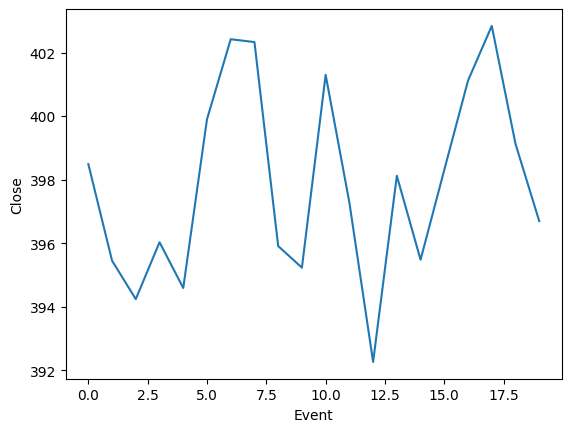

In [88]:
sns.lineplot(data = temp, x = 'Event', y = 'Close')
plt.show()